<a href="https://colab.research.google.com/github/cras-lab/Finance/blob/main/BufferIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한국 시장의 Buffer Index를 개략적으로 구해본다.<BR>
우선 필요한 모듈을 임포트 한다.

In [19]:
import pandas as pd
import yfinance as yf
import numpy as np

KOSPI와 KOSDAQ의 yahoo finance 코드를 설정한다.

In [20]:
KOSPI = "^KS11"
KOSDAQ = "^KQ11"

indices = [ KOSPI, KOSDAQ]

시작과 끝 날짜를 지정한다. 2022년 주가지수를 대상으로 한다.

In [21]:
start = "2022-01-01"
end = "2022-12-31"

버핏지수는 시가총액/GDP로 이루어진다. <BR>
2021년 한국의 실질 GDP를 설정한다.

In [22]:
KR_2021_GDP = 1968.8  # 2021년 한국 실질 GDP (조원) , 출처: 한국은행

주가지수는 시가총액을 지속적으로 조정한다. 여기서는 개략적으로 simulation하므로<BR>
연초와 연말 값을 구한 다음 이를 영업일로 나눠서 안분한 다음, 조정한다.

KOSPI의 경우 연초에 0.739343 즉, 주가지수에 0.739343를 곱하면, 개략적인 시가 총액을 얻고 연말은 0.790214이다.

In [23]:
KOSPI_FACTOR_START = 0.739343
KOSPI_FACTOR_END = 0.790214

유사하게 코스닥 지수의 경우도 설정한다.

In [24]:
KOSDAQ_FACTOR_START = 0.42725
KOSDAQ_FACTOR_END = 0.460191

이제 코스닥과 코스피 지수를 읽어오고 그 종가만 따로 뽑아 데이터프레임에 저장한다. 빈 날짜에는 직전 지수로 채운다.

In [25]:
df = yf.download( indices, start, end, progress=False)["Adj Close"].ffill()

총 영업일이 얼마인지, 개수를 센다. 코스피와 코스닥은 동일하므로 둘 중 하나만 설정한다.

In [26]:
count = df[KOSPI].count()

연초와 연말 사이를 균등 안분하여, interpolation 한다.

In [27]:
KOSPI_MC_Factor = (KOSPI_FACTOR_END - KOSPI_FACTOR_START) /  count
KOSDAQ_MC_Factor = (KOSPI_FACTOR_END - KOSPI_FACTOR_START) /  count

시가총액은 코스피와 코스닥을 합친 수이므로, 이 시가총액을 저장할 배열을 하나 선언한다.

In [28]:
MarketCap = np.zeros( len(df) )

이제 루프를 돌면서, 일별 시가총액을 구한 다음 MarketCap 배열에 저장한다.

In [29]:
KOSPI_factor_sum = KOSPI_FACTOR_START
KOSDAQ_factor_sum = KOSDAQ_FACTOR_START

for i in range(0, len(df)):
  MarketCap[i] =  df[KOSPI][i] * KOSPI_factor_sum + df[KOSDAQ][i] * KOSDAQ_factor_sum
  KOSPI_factor_sum +=  KOSPI_MC_Factor
  KOSDAQ_factor_sum +=  KOSDAQ_MC_Factor

데이터 프레임에 'Bufferindex'라는 열을 하나 생성하고 버핏 지수를 저장한다.

In [30]:
df['BufferIndex'] = MarketCap / KR_2021_GDP

결과를 도식화 해본다.

<Axes: xlabel='Date'>

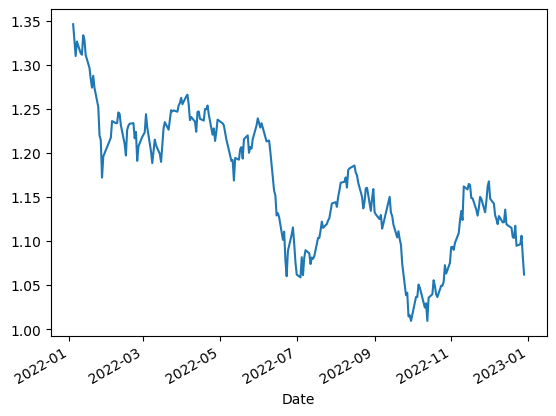

In [31]:
df.BufferIndex.plot()